## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>You're going to explore and analyze Peter Pan's text to answer the question in the instruction pane below. You are working with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. <a href="https://www.datacamp.com/courses/intermediate-importing-data-in-python">Intermediate Importing Data in Python</a> and <a href="https://www.datacamp.com/courses/introduction-to-natural-language-processing-in-python">Introduction to Natural Language Processing in Python</a> teach the skills required to complete this project. Should you decide to use them, English stopwords have been downloaded from <code>nltk</code> and are available for you in your environment.</p>

In [21]:
import requests
import nltk
from bs4 import BeautifulSoup
from collections import Counter

In [22]:
r = requests.get('https://www.gutenberg.org/files/16/16-h/16-h.htm')
r.encoding = 'utf-8'

In [23]:
html = r.text
print(html[:2000])

﻿<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Peter Pan, by J. M. Barrie
    </title>
    <style type="text/css" xml:space="preserve">

    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    .toc2  

In [24]:
soup = BeautifulSoup(html)
text = soup.text
print(text[:2000])

﻿




      Peter Pan, by J. M. Barrie
    


    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    .toc2      { margin-left: 20%;}
    div.fig { display:block; margin:0 auto; text-align:center; }
    .figleft   {float: left; margin-left: 0%; margin-right: 1%;}
    .figright  {float: right; margin-right: 0%; margin-left: 1%;}
    pre     { font-style: italic; font-size: 90%; margin-left: 

In [25]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
print(tokens[:6])

['Peter', 'Pan', 'by', 'J', 'M', 'Barrie']


In [26]:
words = [token.lower() for token in tokens]
print(words[:6])

['peter', 'pan', 'by', 'j', 'm', 'barrie']


In [27]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words[:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [28]:
words_clean = [word for word in words if word not in stop_words]
print(words_clean[:6])

['peter', 'pan', 'j', 'barrie', 'body', 'margin']


In [29]:
count = Counter(words_clean)
top_ten = count.most_common(10)
print(top_ten)

[('peter', 410), ('wendy', 362), ('said', 358), ('would', 219), ('one', 214), ('hook', 175), ('could', 142), ('cried', 136), ('john', 133), ('time', 126)]


In [30]:
protagonists = ['peter', 'wendy', 'hook', 'john']

In [31]:
trimmed_text = text[2583:]
print(trimmed_text[:1000])

   Chapter 1 PETER BREAKS THROUGH
    

      All children, except one, grow up. They soon know that they will grow up,
      and the way Wendy knew was this. One day when she was two years old she
      was playing in a garden, and she plucked another flower and ran with it to
      her mother. I suppose she must have looked rather delightful, for Mrs.
      Darling put her hand to her heart and cried, “Oh, why can't you remain
      like this for ever!” This was all that passed between them on the subject,
      but henceforth Wendy knew that she must grow up. You always know after you
      are two. Two is the beginning of the end.
    

      Of course they lived at 14 [their house number on their street], and until
      Wendy came her mother was the chief one. She was a lovely lady, with a
      romantic mind and such a sweet mocking mouth. Her romantic mind was like
      the tiny boxes, one within the other, that come from the puzzling East,
      however many yo


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [33]:
df = pd.DataFrame(top_ten, columns=['words', 'occurences'])

Text(0.5, 1.0, "Peter Pan's most common words")

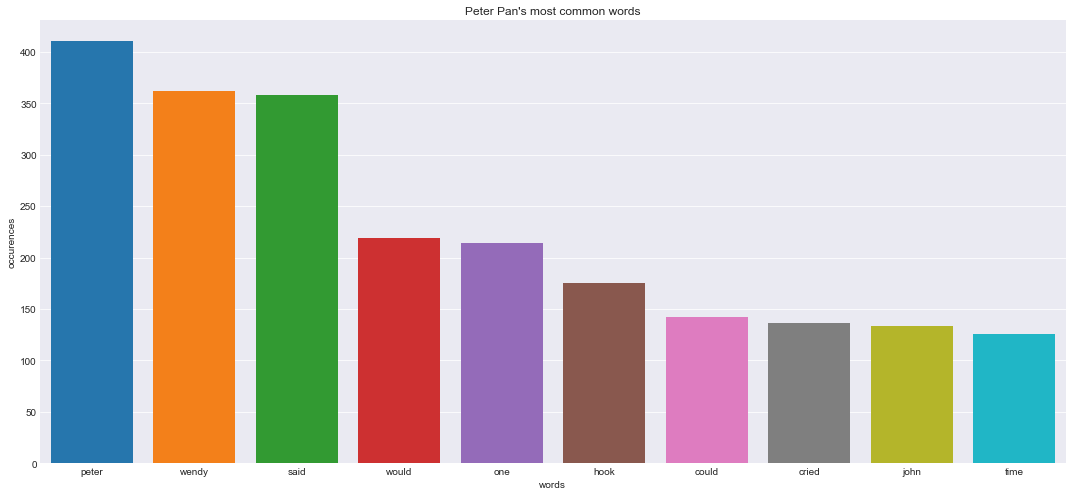

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.barplot(x='words', y='occurences', data=df, saturation=0.9).set_title("Peter Pan's most common words")